### NAME  OF PROJECT :  CREDIT CARD FRAUD DETECTION

### MD. MANIR UDDIN


#### Introduction:
- The credit card and online net banking fraud is an international problem in banking domain. Also as data is increasing in       terms of volume, velocity and variability the performance of machine learning algorithm is becoming bottleneck. The main       challenge for today’s CCFD system is how to improve fraud detection accuracy with growing number of transactions done by user   per second. The increase in number of users and online transactions has brought heavy workloads to these systems.

###### Project Goal
- Credit card companies shall be able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

### STEP #1: PROBLEM STATEMENT

##### Data Set Description

- The datasets contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents       transactions that occurred in two days, where we have 492 frauds out of 284,315 transactions. It has 30 input features and 1   target variable. The dataset is highly unbalanced, the positive class (frauds) account for 0.173% of all transactions.

- The data set is publicly available at https://www.kaggle.com/mlg-ulb/creditcardfraud

- Due to confidentiality issues, Kaggle doesn’t provide the background information about the 28 features out of 30. The only     Features defined are "Time" and "Amount". 'Time' contains the seconds elapsed between each transaction and the first           transaction in the dataset. The feature 'Amount' is the Transaction Amount. ‘Class’ is the target variable and it is 1 in       case of fraud and 0 otherwise.


## STEP #2: IMPORTING DATA

In [1]:
import pandas as pd 
import numpy as np 
import keras 

np.random.seed(2)

Using TensorFlow backend.


In [2]:
data = pd.read_csv('creditcard.csv')

 # Data exploration

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Pre-processing


- In above, you can notice that all the variable are not at the same scale and distribution. Some of the variables have a wide   range of values (like the Amount variable). Machine learning algorithms can’t estimate correct output without the standard     normally distributed data. We will use StandardScaler function from scikit-learn to standardize our data.

In [4]:
from sklearn.preprocessing import StandardScaler
data['normalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Amount'],axis=1)

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [6]:
data = data.drop(['Time'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [7]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

In [8]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


- we will split our dataset into train and test set using 'train_test_split' function. After that we will train our model and     then we will predict using our trained model.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [10]:
X_train.shape

(199364, 29)

In [11]:
X_test.shape

(85443, 29)

In [12]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Deep neural network

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [14]:
model = Sequential([
    Dense(units=16, input_dim = 29,activation='relu'),
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(20,activation='relu'),
    Dense(24,activation='relu'),
    Dense(1,activation='sigmoid'),
])

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
_________________________________________________________________


# Training

In [16]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
199364/199364 [==============================] - 19s 93us/step - loss: 0.0105 - acc: 0.9978
Epoch 2/5
199364/199364 [==============================] - 17s 87us/step - loss: 0.0042 - acc: 0.9994
Epoch 3/5
199364/199364 [==============================] - 17s 88us/step - loss: 0.0037 - acc: 0.9994
Epoch 4/5
199364/199364 [==============================] - 16s 81us/step - loss: 0.0034 - acc: 0.9994
Epoch 5/5
199364/199364 [==============================] - 17s 87us/step - loss: 0.0034 - acc: 0.9994


In [17]:
score = model.evaluate(X_test, y_test)

85443/85443 [==============================] - 2s 18us/step


In [18]:
import matplotlib.pyplot as plt
import itertools

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

#  add
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [19]:
y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)

In [20]:
cnf_matrix = confusion_matrix(y_test, y_pred.round())

In [21]:
print(cnf_matrix)

[[85279    17]
 [   33   114]]


Confusion matrix, without normalization
[[85279    17]
 [   33   114]]


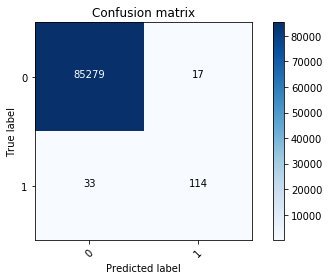

In [22]:
plot_confusion_matrix(cnf_matrix, classes=[0,1])

In [24]:
## We can start by calculating the classification accuracy, precision, recall, and F1 scores.

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred.round())
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred.round())
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred.round())
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred.round())
print('F1 score: %f' % f1)

Accuracy: 0.999415
Precision: 0.870229
Recall: 0.775510
F1 score: 0.820144


Confusion matrix, without normalization
[[284257     58]
 [   103    389]]


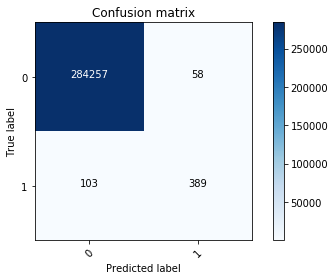

In [25]:
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

In [27]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_expected, y_pred.round())
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(y_expected, y_pred.round())
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_expected, y_pred.round())
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_expected, y_pred.round())
print('F1 score: %f' % f1)

Accuracy: 0.999435
Precision: 0.870246
Recall: 0.790650
F1 score: 0.828541


## Undersampling

In [28]:
fraud_indices = np.array(data[data.Class == 1].index)
number_records_fraud = len(fraud_indices)
print(number_records_fraud)

492


In [29]:
normal_indices = data[data.Class == 0].index

In [30]:
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace=False)
random_normal_indices = np.array(random_normal_indices)
print(len(random_normal_indices))

492


In [31]:
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])
print(len(under_sample_indices))

984


In [32]:
under_sample_data = data.iloc[under_sample_indices,:]

In [33]:
X_undersample = under_sample_data.iloc[:,under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:,under_sample_data.columns == 'Class']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_undersample,y_undersample, test_size=0.3)

In [35]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [36]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
688/688 [==============================] - 0s 685us/step - loss: 0.5150 - acc: 0.9012
Epoch 2/5
688/688 [==============================] - 0s 115us/step - loss: 0.2583 - acc: 0.9201
Epoch 3/5
688/688 [==============================] - 0s 103us/step - loss: 0.1851 - acc: 0.9317
Epoch 4/5
688/688 [==============================] - 0s 116us/step - loss: 0.1879 - acc: 0.9433
Epoch 5/5
688/688 [==============================] - 0s 113us/step - loss: 0.1548 - acc: 0.9404


Confusion matrix, without normalization
[[150   0]
 [ 18 128]]


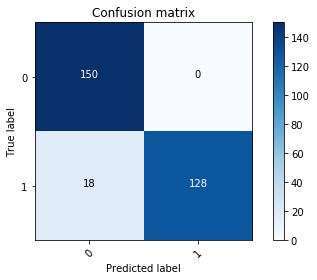

In [38]:
y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

In [39]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_expected, y_pred.round())
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(y_expected, y_pred.round())
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_expected, y_pred.round())
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_expected, y_pred.round())
print('F1 score: %f' % f1)

Accuracy: 0.939189
Precision: 1.000000
Recall: 0.876712
F1 score: 0.934307


Confusion matrix, without normalization
[[283583    732]
 [    53    439]]


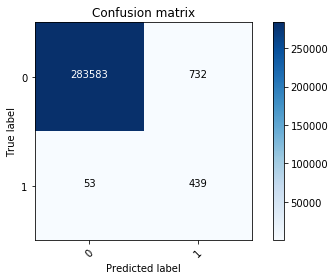

In [40]:
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

In [41]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_expected, y_pred.round())
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(y_expected, y_pred.round())
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_expected, y_pred.round())
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_expected, y_pred.round())
print('F1 score: %f' % f1)

Accuracy: 0.997244
Precision: 0.374893
Recall: 0.892276
F1 score: 0.527962


## SMOTE

In [42]:
from imblearn.over_sampling import SMOTE

In [43]:
X_resample, y_resample = SMOTE().fit_sample(X,y.values.ravel())

In [44]:
y_resample = pd.DataFrame(y_resample)
X_resample = pd.DataFrame(X_resample)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_resample,y_resample,test_size=0.3)

In [46]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [47]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
398041/398041 [==============================] - 36s 91us/step - loss: 0.0332 - acc: 0.9883
Epoch 2/5
398041/398041 [==============================] - 35s 89us/step - loss: 0.0124 - acc: 0.9966
Epoch 3/5
398041/398041 [==============================] - 35s 89us/step - loss: 0.0097 - acc: 0.9977
Epoch 4/5
398041/398041 [==============================] - 36s 90us/step - loss: 0.0083 - acc: 0.9980
Epoch 5/5
398041/398041 [==============================] - 36s 89us/step - loss: 0.0078 - acc: 0.9982


Confusion matrix, without normalization
[[85048   266]
 [   48 85227]]


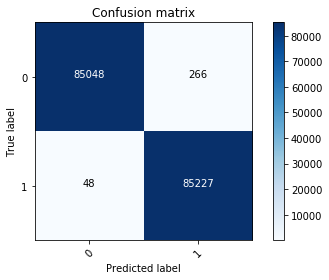

In [48]:
y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

In [49]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_expected, y_pred.round())
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(y_expected, y_pred.round())
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_expected, y_pred.round())
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_expected, y_pred.round())
print('F1 score: %f' % f1)

Accuracy: 0.998159
Precision: 0.996889
Recall: 0.999437
F1 score: 0.998161


## Conclusions

I have created a Deep Neural Network (DNN) that is able to detect the 99% of the fraudulent transactions. However, it detects some of the normal transactions as fraudulents. Nonetheless, the amount of work of the fraud detection department has been significantly reduced.